## A K-means example using Spark MLlib and Jupyter on Windows
<p> Data "Lecture14 - Demo1 (5000_points).txt" is from XSEDE Big Data Workshop in May 18-19, 2017</p>

In [1]:
# The modules we're going to use
import os
import sys

# Add path lines to window system path
sys.path.append(os.environ['SPARK_HOME'] + "\bin")
sys.path.append(os.environ['SPARK_HOME'] + "\python")
sys.path.append(os.environ['SPARK_HOME'] + "\python\pyspark")
sys.path.append(os.environ['SPARK_HOME'] + "\python\lib")
sys.path.append(os.environ['SPARK_HOME'] + "\python\lib\pyspark.zip")
sys.path.append(os.environ['SPARK_HOME'] + "\python\lib\py4j-0.10.4-src.zip")

# Other modules we're going to use
from pyspark import SparkContext
from pyspark import SparkConf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pyspark.mllib.clustering import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

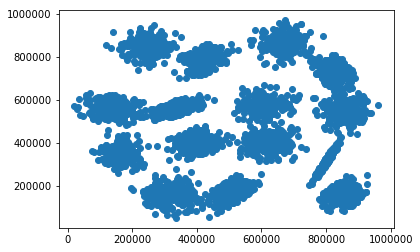

In [2]:
# Create a Spark Context
sc = SparkContext("local", "test")

# Load data
rdd1 = sc.textFile("Lecture14 - Demo1 (5000_points).txt")

# Split it up into a list of integers 
rdd2 = rdd1.map(lambda x:x.split())
rdd3 = rdd2.map(lambda x: [int(x[0]),int(x[1])])

# Convert to numpy array
X = np.asarray(rdd3.collect())

# Plot
plt.scatter(X[:,0],X[:,1])
plt.show()

In [3]:
# Specify number of clusters to build
n_clusters = 15

# Perform k-means
model = KMeans.train(rdd3, n_clusters)

# Print out the error
print n_clusters, model.computeCost(rdd3)

# Obtain centers
k_means_cluster_centers = model.clusterCenters

# Obtain the cluster number of each datapoint
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

15 8.91761561687e+12


C:\Users\hji\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


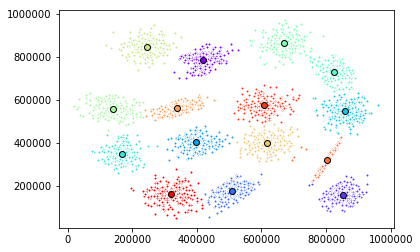

In [4]:
# Generate a set of different colors 
colorset=cm.rainbow(np.linspace(0,1,n_clusters))

# Plot the clustering result
for k, col in zip(range(n_clusters), colorset):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')  
    plt.plot(int(cluster_center[0]), int(cluster_center[1]), 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.show()

In [5]:
# Stop the Spark Context
sc.stop() 